# Example of use

In [1]:
import Skydipper

In [2]:
Skydipper.__version__

'0.3.7'

## Dataset objects

Using known id's you can instantiate a dataset object directly.

In [3]:
ds = Skydipper.Dataset('044f4af8-be72-4999-b7dd-13434fc4a394')
ds

Dataset 044f4af8-be72-4999-b7dd-13434fc4a394 Tree cover

You can access the attributes of a dataset.

In [4]:
ds.attributes

{'application': ['gfw', 'gfw-pro'],
 'attributesPath': None,
 'blockchain': {},
 'clonedHost': {},
 'connectorType': 'rest',
 'connectorUrl': None,
 'createdAt': '2019-09-19T15:25:32.570Z',
 'dataLastUpdated': None,
 'dataPath': None,
 'env': 'production',
 'errorMessage': '[Automatic Validation] ConnectorFailed -> Invalid Dataset',
 'geoInfo': False,
 'layerRelevantProps': [],
 'legend': {'binary': [],
  'boolean': [],
  'byte': [],
  'country': [],
  'date': [],
  'double': [],
  'float': [],
  'half_float': [],
  'integer': [],
  'keyword': [],
  'nested': [],
  'region': [],
  'scaled_float': [],
  'short': [],
  'text': []},
 'mainDateField': None,
 'name': 'Tree cover',
 'overwrite': False,
 'protected': True,
 'provider': 'gee',
 'published': True,
 'slug': 'Tree-cover',
 'sources': [],
 'status': 'saved',
 'subtitle': None,
 'tableName': 'UMD/hansen/global_forest_change_2013',
 'taskId': None,
 'type': None,
 'updatedAt': '2018-11-21T13:55:01.210Z',
 'userId': '596cde7082431535

You can also access the metadata and vocabularies if they exist.

In [5]:
ds.vocabulary[0].attributes

{'application': 'gfw',
 'name': 'categoryTab',
 'resource': {'id': '044f4af8-be72-4999-b7dd-13434fc4a394', 'type': 'dataset'},
 'tags': ['landCover']}

In [6]:
ds.metadata[0].attributes

{'application': 'gfw',
 'createdAt': '2018-08-03T10:17:06.249Z',
 'dataset': '044f4af8-be72-4999-b7dd-13434fc4a394',
 'info': {'citation': '2000/2010, Hansen/UMD/Google/USGS/NASA',
  'color': '#a0c746',
  'description': 'Identifies areas of tree cover.',
  'isSelectorLayer': True,
  'name': 'Tree cover'},
 'language': 'en',
 'resource': {'id': '044f4af8-be72-4999-b7dd-13434fc4a394', 'type': 'dataset'},
 'status': 'published',
 'updatedAt': '2018-11-06T15:57:49.716Z'}

## Queries on Datasets

Datasets can be queried via SQL, with a table returned. Currently this is only supported for Carto-type data:

In [7]:
d = Skydipper.Dataset(id_hash='bd5d7924-611e-4302-9185-8054acb0b44b')
d

Dataset bd5d7924-611e-4302-9185-8054acb0b44b Global Mangrove Watch

In [8]:
d.query('SELECT fid, ST_ASGEOJSON(the_geom_webmercator) FROM data LIMIT 5')

,fid,st_asgeojson
0,0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-6998..."
1,62,"{""type"":""MultiPolygon"",""coordinates"":[[[[-6927..."
2,343,"{""type"":""MultiPolygon"",""coordinates"":[[[[-6996..."
3,402,"{""type"":""MultiPolygon"",""coordinates"":[[[[-7004..."
4,682,"{""type"":""MultiPolygon"",""coordinates"":[[[[-6937..."


## Layer Objects

Similarly, you can also instantiate a Layer object.

In [9]:
ly = Skydipper.Layer(id_hash='dc6f6dd2-0718-4e41-81d2-109866bb9edd')
ly

Layer dc6f6dd2-0718-4e41-81d2-109866bb9edd Tree cover 2000

Layers can be visulized if appropriate via a call to Layer().map()

In [10]:
ly.map()

## Tables

Tables are subclasses of Dataset objects. They are document datasets which can be instantiated and queried returning a dataframe object.

In [11]:
t = Skydipper.Table(id_hash='86c7135a-855d-4f1b-9d67-f545a93281b3')
t

Table 86c7135a-855d-4f1b-9d67-f545a93281b3 AQ City Days (DUMMY, NOT FOR PUBLISH))

In [12]:
df = t.head(3)
df

,City,Number_of_Days,_id
0,Beijing,14,AWILuq8j8Jqrt1rp-STQ
1,San Francisco,10,AWILuq8j8Jqrt1rp-STT
2,Manama,7,AWILuq8j8Jqrt1rp-STU


Queries to tables are returned in geopandas dataframe format.

In [13]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [14]:
t.query("SELECT * from data where City = 'San Francisco'")

,City,Number_of_Days,_id
0,San Francisco,10,AWILuq8j8Jqrt1rp-STT


## Collection objects: Searching

If you don't know what data you are interested in advance, you can search by keywords and return a list of objects.

In [15]:
c = Skydipper.Collection('tree cover', object_type=['layer','dataset'], app=['gfw'], limit=10)

In [16]:
c

[0. Dataset f3fc0f1e-aa26-49b6-8741-45df2eea9ac2 Brazil Land Cover,
 1. Dataset b3bfa285-ab43-4562-b2e0-0ab3e92c59e3 Brazil Land Cover 1985-2017,
 2. Layer 220080ec-1641-489c-96c4-4885ed618bf3 Brazil land cover - 2000-2016,
 3. Layer c9787e5e-5430-41da-9a87-c5a3803b5fbb Brazil land cover 1985,
 4. Layer 63d11b29-ef2b-418f-9156-aa56651be548 Brazil land cover 1986,
 5. Layer fa2c264e-a797-4a6b-9389-b8166b137ccb Brazil land cover 1987,
 6. Layer 5665d14d-4887-4b0e-9a56-3eee1467c46d Brazil land cover 1988,
 7. Layer b95f63fd-a6b7-44d5-aba8-bd301f9eedd9 Brazil land cover 1989,
 8. Layer 5ddd96a3-ffd2-40e5-aec6-eaca9830dc9c Brazil land cover 1990,
 9. Layer fea2be6c-bed4-49bb-b28b-0744cf60c0d4 Brazil land cover 1991]

Searching can be restricted with keyword arguments to specifically search types of items, applications, and more. If you want to render those items, you will need to do the following.

You can access items from a collection using subscripts, slices and more. Note that slicing, or selecting by element instantiates the Layer, Table, or Dataset object.

In [17]:
c[0:3]

[Dataset f3fc0f1e-aa26-49b6-8741-45df2eea9ac2 Brazil Land Cover,
 Dataset b3bfa285-ab43-4562-b2e0-0ab3e92c59e3 Brazil Land Cover 1985-2017,
 Layer 220080ec-1641-489c-96c4-4885ed618bf3 Brazil land cover - 2000-2016]

In [18]:
c[-1]

Layer fea2be6c-bed4-49bb-b28b-0744cf60c0d4 Brazil land cover 1991

In [19]:
l = c[-1]
l.map()

## Create a Geometry object

Often you will need to perform some kind of intersect analysis between data held in datasets and tables and a geometry.
We will now show you multiple ways to create your geometry objects.

### From an ID

Vizzuality's API holds geometry objects as a Geostore item. Geostore items are accessed by an id-hash. If you know the hash of your object already you can simply call a geometry like so:

In [20]:
g = Skydipper.Geometry(id_hash='e8b6f974bcab5aefccd121654860be06')
g

Geometry e8b6f974bcab5aefccd121654860be06

### Geometry attributes

The attributes can be accessed as a dictionary.

In [21]:
g.attributes

{'areaHa': 16931274.241571266,
 'bbox': [-49.6113281249728,
  -9.77447583284213,
  -44.513671874972,
  -4.19348629349041],
 'geojson': {'crs': {},
  'features': [{'geometry': {'coordinates': [[[-47.8535156249717,
        -4.19348629349041],
       [-49.6113281249728, -9.77447583284213],
       [-44.513671874972, -9.25438811084709],
       [-47.8535156249717, -4.19348629349041]]],
     'type': 'Polygon'},
    'properties': None,
    'type': 'Feature'}],
  'type': 'FeatureCollection'},
 'hash': 'e8b6f974bcab5aefccd121654860be06',
 'info': {'use': {}},
 'lock': False,
 'provider': {}}

### Geometry as a Table

Table method returns a dataframe of the geometry object. Map will add a Folium map with the geomerty rendered.

In [22]:
g.table()

,areaHa,bbox,geometry,id,use
0,1.693127e+07,"[-49.6113281249728, -9.77447583284213, -44.513...","POLYGON ((-47.8535156249717 -4.19348629349041,...",e8b6f974bcab5aefccd121654860be06,{}


### Mapping the Geometry

Calling .map() will create a Folium map with the geomerty rendered.

In [23]:
g.map()

### From Geojson - Points

You can create an object as you need on the fly from geojson. The act of creating an object will also register it to a Geostore service of your choice (locally, or on a remote server). You can create a geometry object from geojson Points and MultiPoints type data as follows:

In [24]:
atts = {'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'MultiPoint', 'coordinates': [[-4.29, 39.1097]]}}]}}

point = Skydipper.Geometry(attributes=atts, server='https://production-api.globalforestwatch.org')
point

Geometry 09405592c74fc4f2443d8245ddc0a45e

### From Geojson - Polygons

You can create an object as you need on the fly from geojson. The act of creating an object will also register it to a Geostore service of your choice (locally, or on a remote server).
You can create a geometry object from Geojson Polygon and Multipolygon type data as follows:

In [25]:
atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [[[82.265625, 32.84267363195431],
       [77.34374999999999, 27.059125784374068],
       [85.4296875, 22.268764039073968],
       [90.3515625, 28.304380682962783],
       [87.5390625, 32.54681317351514],
       [82.265625, 32.84267363195431]]]}}]}}


g1 = Skydipper.Geometry(attributes=atts)
g1

Geometry 75857ff50bc4cbaa687bfdf5070ffdfa

In [26]:
g1.map()

### From a Shapely object

Shapely objects are at the root of popular python geolibraries such as Geopandas. We can recieve those geometry objects and create a Geometry object (simultaneously registering it in a Vizzuality Geostore server).

In [27]:
import geopandas as gpd

In [28]:
%%writefile ./sample.geojson
{"features":[{"properties":null,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[-43.1343734264374,-8.07358087603511],[-43.1327533721924,-8.08277985402466],[-43.1298887729645,-8.08181322762719],[-43.1103515625,-8.07815914647929],[-43.1094932556152,-8.07799981079283],[-43.1094932556152,-8.09641859926744],[-43.1103515625,-8.09645046495416],[-43.1187307834625,-8.0967372560211],[-43.1186878681183,-8.10273857778317],[-43.1186771392822,-8.10358831522616],[-43.1476235389709,-8.10358831522616],[-43.1477630138397,-8.10273857778317],[-43.1505310535431,-8.08645513764317],[-43.1517112255096,-8.08057041885644],[-43.1439757347107,-8.0795931648273],[-43.1448876857758,-8.07574785969913],[-43.1343734264374,-8.07358087603511]]]}}],"crs":{},"type":"FeatureCollection"}

Overwriting ./sample.geojson


In [29]:
df = gpd.read_file('./sample.geojson')
df

,geometry
0,POLYGON ((-43.1343734264374 -8.073580876035111...


Hello! 👋 I am a <class 'shapely.geometry.polygon.Polygon'>


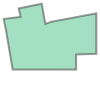

In [30]:
s = df.geometry[0]
print(f"Hello! 👋 I am a {type(s)}")
s

In [31]:
g = Skydipper.Geometry(s=s)

In [32]:
g

Geometry 807098a2fafccb20b6437e64d4229b00

### From Political Boundaries

We are able to return political boundaries (based on [GADM](https://gadm.org/) data) using ISO, admin keys, down to admin-2 level. These should be passed in a dictionary to params. GADM 3.6 is currently used by default.

In [33]:
params={
    'iso': 'BRA',
    'adm1': None,
    'adm2': None
}
admin = Skydipper.Geometry(parameters=params)
admin.map()

### From an admin geometry with an older GADM version 

Alternatively, you can specify a different gadm version.

In [34]:

params={
    'iso': 'BRA',
    'adm1': 1,
    'adm2': 1,
    'gadm': '2.7'
}
admin_v1 = Skydipper.Geometry(parameters=params)
admin_v1.map()

### From a Carto table and index

You can also return geometries directly from a Carto table (under the public WRI-01 account) using the table name and cartodb_id.


In [35]:
params={
    'table': 'gfw_logging',
    'id': 123
}
row_geom = Skydipper.Geometry(parameters=params)
row_geom.map()

## Describe a Geometry 

Return a title and textual description of a geometry in any language.

In [36]:
g.map()

In [37]:
%%time
g.describe()

Title: Area in Microrregião de São Raimundo Nonato, Piauí, Brazil
Description: The regions habitat is comprised of Caatinga. This region has no Intact Forest. The area has a predominantly equatorial climate with dry winters. It is part of the Tropical and Subtropical Dry Broadleaf Forests biome. The location is predominantly land area. Area of 1.15kha located in a lowland area.
CPU times: user 26.1 ms, sys: 2.18 ms, total: 28.2 ms
Wall time: 1.49 s


In [38]:
g.describe(lang='es') # same description but this time in Spanish

Title: Área en la Microrregião de São Raimundo Nonato, Piauí, Brasil
Description: El hábitat regiones se compone de Caatinga. Esta región no tiene bosque intacto. La zona tiene un clima predominantemente ecuatorial, con inviernos secos. Es parte del bioma secos tropicales y subtropicales de hoja ancha bosques. La ubicación es predominantemente la superficie terrestre. Área de 1.15kha situado en una zona de tierras bajas.


Second example of geodescriber, but considering a larger area.

In [39]:
atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [[[82.265625, 32.84267363195431],
       [77.34374999999999, 27.059125784374068],
       [85.4296875, 22.268764039073968],
       [90.3515625, 28.304380682962783],
       [87.5390625, 32.54681317351514],
       [82.265625, 32.84267363195431]]]}}]}}


g2 = Skydipper.Geometry(attributes=atts)
g2

Geometry 75857ff50bc4cbaa687bfdf5070ffdfa

In [40]:
g2.map()

In [41]:
g2.describe()

Title: Area near Nepal, Asia
Description: The region is made up of different habitats, including Central Tibetan Plateau alpine steppe, and Upper Gangetic Plains moist deciduous forests. This region contains some Intact Forest. The most common environmental conditions of the area are polar tundra climate. The region is made up of several types of biomes, including Montane Grasslands and Shrublands, and Tropical and Subtropical Moist Broadleaf Forests. The location is predominantly land area. Area of 89.13Mha located in a mix of lowland and mountainous areas.


After running describe, the results are avaiable as geometry.description

In [42]:
g2.description

{'description': 'The region is made up of different habitats, including Central Tibetan Plateau alpine steppe, and Upper Gangetic Plains moist deciduous forests. This region contains some Intact Forest. The most common environmental conditions of the area are polar tundra climate. The region is made up of several types of biomes, including Montane Grasslands and Shrublands, and Tropical and Subtropical Moist Broadleaf Forests. The location is predominantly land area. Area of 89.13Mha located in a mix of lowland and mountainous areas.',
 'lang': 'en',
 'title': 'Area near Nepal, Asia'}

## Add a satellite image to the map of your Geometry

### Single images

The Geometry().map() method supports the return of recent satellite imagery. We calculate the centroid of your geometry and return the best, most recent image that intersects with that point. This is simply to provide context to your geometry. For point geometries we return the best cloud-free image we can find within a specified date range.

In [43]:
# Create a point

atts = {'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'MultiPoint', 'coordinates': [[-4.29, 39.1097]]}}]}}

point = Skydipper.Geometry(attributes=atts, server='https://production-api.globalforestwatch.org')
point

Geometry 09405592c74fc4f2443d8245ddc0a45e

In [44]:
point.map(image=True, start='2018-01-01', end='2018-12-31')

### Composite images

Whereas for polygon-type geoms we return a cloud-free composite image clipped to your geometry.

In [45]:
# Create a polygon

atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [[[-0.87890625, 43.329173667843904],
       [-1.6149902343749998, 42.75104599038353],
       [-1.1865234375, 42.35854391749705],
       [-0.6427001953125, 42.755079545072135],
       [-0.45043945312499994, 42.9524020856897],
       [-0.87890625, 43.329173667843904]]]}}]}}

g1 = Skydipper.Geometry(attributes=atts, server='https://production-api.globalforestwatch.org')
g1

Geometry 99e57dfb0832d621c485a7ca9e3a0160

In [46]:
g1.map(image=True, instrument='sentinel')

## Display a Layer and Geometry together

In [47]:
atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [[[-48.131103515625, -0.6001172008725418],
       [-48.13934326171875, -0.9791088369866402],
       [-47.86331176757812, -0.9818550168696459],
       [-47.616119384765625, -0.8459165322899671],
       [-47.50213623046875, -0.7182123915862891],
       [-47.51861572265625, -0.5287095375108173],
       [-47.882537841796875, -0.5163504323777461],
       [-48.131103515625, -0.6001172008725418]]]}}]}}
g = Skydipper.Geometry(attributes=atts)
l = Skydipper.Layer(id_hash='3ef039ba-29c7-459d-aadd-66d6e6cc8f5e')
l

Layer 3ef039ba-29c7-459d-aadd-66d6e6cc8f5e Mangrove biomass density

In [48]:
l.map(geometry=g)

## Intersecting Raster data with Geometry objects

Any Layer or Dataset objects based on an Earth Engine raster can be intersected with Skydipper.Geometry objects.

### Dataset Intersections
In the first instance we show the result of an intersect between a geometry roughly bounding London, and a Population density layer.

In [49]:
atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [
          [
            [
              -0.5712890625,
              51.28940590271679
            ],
            [
              0.48339843749999994,
              51.28940590271679
            ],
            [
              0.48339843749999994,
              51.781435604431195
            ],
            [
              -0.5712890625,
              51.781435604431195
            ],
            [
              -0.5712890625,
              51.28940590271679
            ]
          ]
        ]}}]}}

g = Skydipper.Geometry(attributes=atts)


In [50]:
ds = Skydipper.Dataset(id_hash='a4e9c32d-d037-4c50-a893-967cad193537')
ds

Dataset a4e9c32d-d037-4c50-a893-967cad193537 Population Density

In [51]:
ds.layers[0].map(geometry=g)

Finally, you can call the intersect function on the dataset object to see a dictionary of values.

In [52]:
ds.intersect(geometry=g)

{'population-density': {'count': 138767,
  'max': 5984.53564453125,
  'mean': 1.5942131871343077,
  'min': 0.0,
  'stdev': 31.059972394495446,
  'sum': 221224.18133906648}}

### Layer Intersections

Intersections against layers work in the same manner. Here we show an intersect between an area along Brazil's coast and a Mangrove biomass density Layer.

In [53]:
atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': 

[
          [
            [
              -52.16308593749999,
              -1.669685500986571
            ],
            [
              -46.9775390625,
              -1.669685500986571
            ],
            [
              -46.9775390625,
              0.7909904981540058
            ],
            [
              -52.16308593749999,
              0.7909904981540058
            ],
            [
              -52.16308593749999,
              -1.669685500986571
            ]
          ]
        ]
                 }}]}}

g = Skydipper.Geometry(attributes=atts)


In [54]:
ly = Skydipper.Layer('3ef039ba-29c7-459d-aadd-66d6e6cc8f5e')
ly

Layer 3ef039ba-29c7-459d-aadd-66d6e6cc8f5e Mangrove biomass density

In [55]:
ly.map(geometry=g)

In [56]:
ly.intersect(geometry=g)

{'b1': {'count': 135511,
  'max': 32.262001037597656,
  'mean': 2.3417258825859957,
  'min': 0.5376999974250793,
  'stdev': 5.0781633479771395,
  'sum': 302242.0047789521}}

## ImageCollection: Search for satellite images

You can search for Landsat-8 and Sentinel-2 imagery using the ImageCollection module as follows:

In [57]:
ic = Skydipper.ImageCollection(lon=28.3, lat=-16.6, start='2018-08-01', end='2018-08-10') # n.b. lon/lat are temporarily flipped

In [58]:
ic

[0. Image Sentinel-2A 2018-08-08 07:56:11Z,
 1. Image LANDSAT_8 2018-08-05 08:11:14Z,
 2. Image Sentinel-2B 2018-08-03 07:56:09Z]

In [59]:
type(ic)

Skydipper.imageCollection.ImageCollection

All types of pythonic list mainipulation are supported on the image collection results. Including iteration:

In [60]:
for i in ic[0:2]:
    print(i)

Image COPERNICUS/S2/20180808T075611_20180808T081515_T35KPB
Image LANDSAT/LC08/C01/T1_RT_TOA/LC08_172071_20180805


...and subsetting to access individual Images.

## Images: Individual satellite tiles

In [61]:
i = ic[0]
i

Image COPERNICUS/S2/20180808T075611_20180808T081515_T35KPB

In [62]:
type(i)

Skydipper.image.Image

You can access the Image attributes, which indicate the provinence of the tile. 

In [63]:
i.attributes

{'provider': 'COPERNICUS/S2/20180808T075611_20180808T081515_T35KPB'}

### Mapping Satellite Images

You can also display web-map tiles and the bounding-box of the satellite image.

In [64]:
i.map()

### Classification of individual Satellite Images

In [65]:
classified = i.classify()
classified

Image COPERNICUS/S2/20180808T075611_20180808T081515_T35KPB

In [66]:
classified.map()

### Composite and classify satellite image collections

First grab a collection, specifying a point and time period.

In [67]:
ic = Skydipper.ImageCollection(lon=28.271979, lat=-16.457814, start='2018-06-01', end='2018-06-20')
ic

[0. Image Sentinel-2A 2018-06-19 07:56:11Z,
 1. Image LANDSAT_8 2018-06-18 08:10:49Z,
 2. Image Sentinel-2B 2018-06-14 07:56:09Z,
 3. Image Sentinel-2B 2018-06-14 07:56:09Z,
 4. Image Sentinel-2A 2018-06-09 07:56:11Z,
 5. Image Sentinel-2B 2018-06-04 07:56:09Z,
 6. Image LANDSAT_8 2018-06-02 08:10:40Z]

Next ask for a composite image based on your collection. By default it will be for Sentinel-2, but you may change this via an argument to Landsat.

In [68]:
i = ic.composite()
i

Image Sentinel2

You can then map your composite image.

In [69]:
i.map()

You can take your composite image, and apply a land cover classifier based on our pre-trained models. These are Deepvel, and Segnet.

In [72]:
c = i.classify(model_type='segnet', version='v2')
c

Image Sentinel2

In [73]:
c.map()

## Construct Widgets

A demo of how to use Skydipper to construct widgets like those on our projects such as [Global Forest Watch Dashboard pages](https://www.globalforestwatch.org/dashboards/country/BRA).

### Tree cover example

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# Get a datatable (Hansen)
table = Skydipper.Table('a20e9c0e-8d7d-422f-90f5-3b9bca355aaf')
table

Table a20e9c0e-8d7d-422f-90f5-3b9bca355aaf country page data for admin level 2)

In [76]:
iso = 'BRA'
administration = 1

sql = f"""
        SELECT 
            SUM(area_extent) as value,
            SUM(area_admin) as total_area 
        FROM data 
        WHERE iso = '{iso}'
        AND adm1 = {administration}
        AND thresh = 30 
        AND polyname = 'admin'
"""

results = table.query(sql=sql)
results

,total_area,value
0,1.527330e+07,1.140593e+07


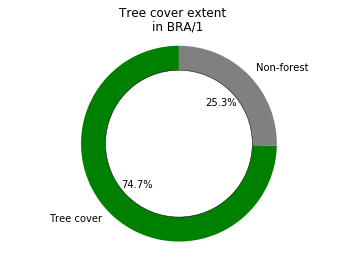

In [77]:
sizes = [results.value[0], results.total_area[0] - results.value[0]]
colors = ['green','grey']
labels = ['Tree cover', 'Non-forest']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=0.5)
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
plt.suptitle('Tree cover extent')
plt.title(f'in {iso}/{administration}')
plt.show()

### Tree cover loss example

In [78]:
sql = """
SELECT 
    polyname, year_data.year as year, 
    SUM(year_data.area_loss) as area

FROM data 
WHERE polyname = 'admin'
AND thresh= 30
GROUP BY polyname, iso, nested(year_data.year)
"""
global_loss = table.query(sql=sql)
global_loss.head()

,area,iso,polyname,year
0,2.746361e+06,BRA,admin,2001
1,3.507049e+06,BRA,admin,2002
2,3.248527e+06,BRA,admin,2003
3,3.848771e+06,BRA,admin,2004
4,3.486563e+06,BRA,admin,2005


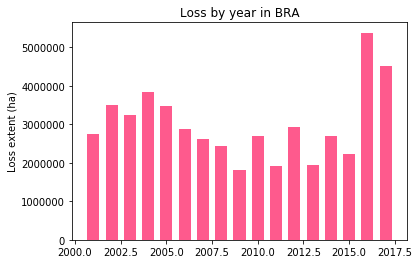

In [79]:
iso='BRA'
loss_data = list(global_loss[global_loss['iso'] == f'{iso}']['area'])
years = list(global_loss[global_loss['iso'] == f'{iso}']['year'])

width = 0.66
fig, ax = plt.subplots()
rects1 = ax.bar(years, loss_data, width, color='#FE5A8D')

# add some text for labels, title and axes ticks
ax.set_ylabel('Loss extent (ha)')
ax.set_title(f'Loss by year in {iso}')
plt.show()

## Creating a local backup of Data objects

Save a local backup of a collection to a specified path. This creates a folder containing a JSON for each dataset and it's associated Layers, Metadata and Vocabularies.

In [80]:
col = Skydipper.Collection(app=['gfw'], env='production')

In [81]:
path = './LMI-BACKUP'

In [82]:
col.save(path)

  0%|          | 0/330 [00:00<?, ?it/s]

Saving to path: ./LMI-BACKUP


100%|██████████| 330/330 [01:29<00:00,  3.67it/s]

Save complete!


## Load Data objects from local backup

You can also load a previous version from local backup.

In [84]:
import os

In [85]:
files = os.listdir(path)[0:3]
files

['a92ceeea-684a-4d39-89e1-4ca97673cb5a.json',
 'b70f070b-c9ae-4452-aa8e-2280a2604666.json',
 '89755b9f-df05-4e22-a9bc-05217c8eafc8.json']

In [86]:
ds_id = files[0].split('.json')[0]
ds_id

'a92ceeea-684a-4d39-89e1-4ca97673cb5a'

In [87]:
dataset = Skydipper.Dataset(ds_id)

In [88]:
dataset

Dataset a92ceeea-684a-4d39-89e1-4ca97673cb5a Example NLCD Dataset

In [89]:
backup = dataset.load(path)

In [90]:
backup

Dataset a92ceeea-684a-4d39-89e1-4ca97673cb5a Example NLCD Dataset